# Melting Dynamics

This is a notebook to understand the dynamics of crystal melting, in particular how much of the slowdown of the melting can be attributed to the slow dynamics.

In [136]:
# Import required modules
import pandas as pd
import numpy as np
import altair as alt
from ipywidgets import interact, ToggleButtons, IntSlider

## Input data

The data for this notebook is sourced from the calculations of the relaxation times which can be run using the makefile in the home directory of this repository. The command `make relaxations` will compute the relaxation values that are required for this analysis, although if not run previously the command `make dynamics` will also need to be run as I am yet to set up any dependencies in the Makefile.

The calculation of the melting rates is performed in the [Crystal_Clustering](Crystal_Clustering.ipynb) notebook from calculations of crystal fractions from running `make melting`.

In [137]:
df_relax = pd.read_hdf('../data/analysis/dynamics.h5', 'relaxations')
df_relax.reset_index(inplace=True)
df_relax['1/D'] = 1 / df.diffusion_constant
df_relax['temperature'] = df_relax['temperature'].astype(float)
df_relax['pressure'] = df_relax['pressure'].astype(float)

df_melting = pd.read_hdf("../data/analysis/melting.h5", "rates")
df_melting['temperature'] = df_melting['temperature'].astype(float)
df_melting['pressure'] = df_melting['pressure'].astype(float)
df_melting['inv_melting_rate'] = np.abs(1/df_melting['melting_rate'].values)
df_melting.set_index(['temperature', 'pressure'], inplace=True)

## Merge Dataframes

This merges the dataframes containing the data on the timescale of relaxations and the timescale of melting.

In [156]:
df_timescales = df_relax.merge(df_melting, on=['temperature', 'pressure'])
df_timescales['pressure'] = df_timescales['pressure'].astype(str)

In [157]:
df_timescales.columns

Index(['temperature', 'pressure', 'tau_D1_mean', 'tau_D1_hmean',
       'tau_D04_mean', 'tau_D04_hmean', 'tau_DL04_mean', 'tau_DL04_hmean',
       'tau_T2_mean', 'tau_T2_hmean', 'tau_T3_mean', 'tau_T3_hmean',
       'tau_T4_mean', 'tau_T4_hmean', 'max_alpha_time', 'tau_F',
       'max_gamma_time', 'diffusion_constant', 'tau_R1', 'tau_R2', 'tau_S',
       '1/D', 'crys', 'melting_rate', 'inv_melting_rate'],
      dtype='object')

In [158]:
df_timescales.pressure.astype('str')

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28    13.5
29    13.5
30    13.5
31    13.5
32    13.5
33    13.5
34    13.5
35    13.5
36    13.5
37    13.5
38    13.5
39    13.5
Name: pressure, dtype: object

In [186]:
def create_chart(axis):
    chart = alt.Chart(df_timescales, width=400, height=500).mark_point(size=75).transform_calculate(
        '1/T', '1/datum.temperature'
    ) .encode(
        x=alt.X('1/T:Q', scale=alt.Scale(zero=False)),
        y=alt.Y(axis, type='quantitative', axis=alt.Axis(format='e'), scale=alt.Scale(type='log')),
        color="crys:N",
        tooltip=[alt.Tooltip(f'{axis}:Q', format='.2e')]
    )
    return chart.transform_filter(alt.datum.pressure == '1.0')

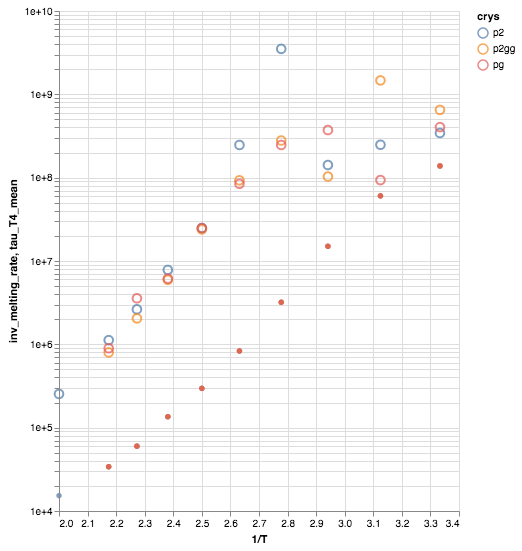

In [205]:
create_chart('inv_melting_rate') + create_chart('tau_T4_mean').mark_point(filled=True)

In [188]:
df_timescales['tau_T4_melting_rate'] = df_timescales["tau_T4_mean"]*df_timescales["melting_rate"].abs()
df_timescales['timescale_per_event'] = 1/df_timescales['tau_T4_melting_rate']

In [203]:
c = create_chart("tau_T4_melting_rate")

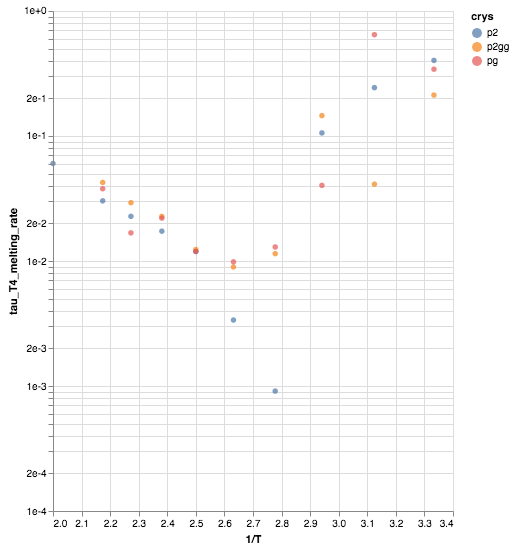

In [204]:
c.mark_point(filled=True)

In [198]:
df_timescales.query('pressure == "1.0"').melting_rate

0     2.912497e-09
1     1.537109e-09
2     2.475822e-09
3     4.030058e-09
4    -6.809603e-10
5    -1.069103e-08
6     7.046161e-09
7     9.691795e-09
8     2.682866e-09
9     2.847865e-10
10    3.580997e-09
11    4.050230e-09
12   -4.050890e-09
13   -1.077266e-08
14   -1.183973e-08
15   -4.021760e-08
16   -4.175000e-08
17   -4.027328e-08
18   -1.279826e-07
19   -1.681884e-07
20   -1.628280e-07
21   -3.798329e-07
22   -4.881784e-07
23   -2.801310e-07
24   -8.913332e-07
25   -1.250760e-06
26   -1.113918e-06
27   -3.941677e-06
Name: melting_rate, dtype: float64